In [45]:
%matplotlib notebook

In [46]:
#get data from police csv
#import dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [47]:
#link to the csv
police_data = pd.read_csv("Police_csv.csv")
police_data.head()

,Unnamed: 0,Unsafespeedcrashes/2020,Improperturningcrashes/2020,DUIcrashes/2020,Othercrashes/2020,Unsafespeedcrashes/2019,Improperturningcrashes/2019,DUIcrashes/2019,Othercrashes/2019
0,Entire Period,"19,029","10,292","4,942","10,947","33,072","10,906","5,589","15,132"
1,2/3/20,521,171,102,253,708,215,114,277
2,2/10/20,535,193,120,303,713,214,82,260
3,2/17/20,563,184,100,250,548,169,88,258
4,2/24/20,624,186,98,292,674,220,105,272


In [48]:
#Rename first column to date and remove Entire Period row
police_data.dtypes

Unnamed: 0                     object
Unsafespeedcrashes/2020        object
Improperturningcrashes/2020    object
DUIcrashes/2020                object
Othercrashes/2020              object
Unsafespeedcrashes/2019        object
Improperturningcrashes/2019    object
DUIcrashes/2019                object
Othercrashes/2019              object
dtype: object

In [49]:
police_data = police_data.rename(columns= {"Unnamed: 0":"Date", "DUIcrashes/2020":"DUI crashes 2020", "DUIcrashes/2019":"DUI crashes 2019"})
police_data.head(20)

,Date,Unsafespeedcrashes/2020,Improperturningcrashes/2020,DUI crashes 2020,Othercrashes/2020,Unsafespeedcrashes/2019,Improperturningcrashes/2019,DUI crashes 2019,Othercrashes/2019
0,Entire Period,"19,029","10,292","4,942","10,947","33,072","10,906","5,589","15,132"
1,2/3/20,521,171,102,253,708,215,114,277
2,2/10/20,535,193,120,303,713,214,82,260
3,2/17/20,563,184,100,250,548,169,88,258
4,2/24/20,624,186,98,292,674,220,105,272
5,3/2/20,531,223,110,303,617,192,98,263
6,3/9/20,655,269,102,253,593,213,124,330
7,3/16/2020,333,178,58,146,665,193,101,300
8,3/23/20,161,150,71,120,594,197,98,279
9,3/30/20,162,152,64,116,562,205,96,253


In [50]:
#Remove asterisk from date '3/16/2020'
police_data['Date'].unique()

array(['Entire Period', '2/3/20', '2/10/20', '2/17/20', '2/24/20',
       '3/2/20', '3/9/20', '3/16/2020', '3/23/20', '3/30/20', '4/6/20',
       '4/13/20', '4/20/20', '4/27/20', '5/4/20', '5/11/20', '5/18/20',
       '5/25/20', '6/1/20', '6/8/20', '6/15/20', '6/22/20', '6/29/20',
       '7/6/20', '7/13/20', '7/20/20', '7/27/20', '8/3/20', '8/10/20',
       '8/17/20', '8/24/20', '8/31/20', '9/7/20', '9/14/20', '9/21/20',
       '9/28/20', '10/5/20', '10/12/20', '10/19/20', '10/26/20',
       '11/2/20', '11/9/20', '11/16/20', '11/23/20', '11/30/20',
       '12/7/20', '12/14/20', '12/21/20', '12/28/20', '1/4/21', '1/11/21',
       '1/18/21', '1/25/21', '2/1/21'], dtype=object)

In [52]:
#Remove first summary row from the data set 'Entire Period'
police_data = police_data.loc[police_data['Date'] !="Entire Period"]
police_data.head(20)

,Date,Unsafespeedcrashes/2020,Improperturningcrashes/2020,DUI crashes 2020,Othercrashes/2020,Unsafespeedcrashes/2019,Improperturningcrashes/2019,DUI crashes 2019,Othercrashes/2019
1,2/3/20,521,171,102,253,708,215,114,277
2,2/10/20,535,193,120,303,713,214,82,260
3,2/17/20,563,184,100,250,548,169,88,258
4,2/24/20,624,186,98,292,674,220,105,272
5,3/2/20,531,223,110,303,617,192,98,263
6,3/9/20,655,269,102,253,593,213,124,330
7,3/16/2020,333,178,58,146,665,193,101,300
8,3/23/20,161,150,71,120,594,197,98,279
9,3/30/20,162,152,64,116,562,205,96,253
10,4/6/20,360,189,66,111,590,193,95,279


In [53]:
#groupby function to set apart my more important variables
DUI_crashes_df = police_data[["Date", "DUI crashes 2020", "DUI crashes 2019"]]
DUI_crashes_df

,Date,DUI crashes 2020,DUI crashes 2019
1,2/3/20,102,114
2,2/10/20,120,82
3,2/17/20,100,88
4,2/24/20,98,105
5,3/2/20,110,98
6,3/9/20,102,124
7,3/16/2020,58,101
8,3/23/20,71,98
9,3/30/20,64,96
10,4/6/20,66,95


In [72]:
#define dtype
type(DUI_crashes_df["Date"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [73]:
#convert Date from string to actual dates
#print(DUI_crashes_df["Date"])
#DUI_crashes_df["Date"]= pd.to_datetime(DUI_crashes_df["Date"], format ='%m%m%Y')
#DUI_crashes_df.info()

In [83]:
plt.hist(DUI_crashes_df['DUI crashes 2020'])
plt.xlabel('Date')
plt.ylabel('Counts')
plt.show()

<IPython.core.display.Javascript object>


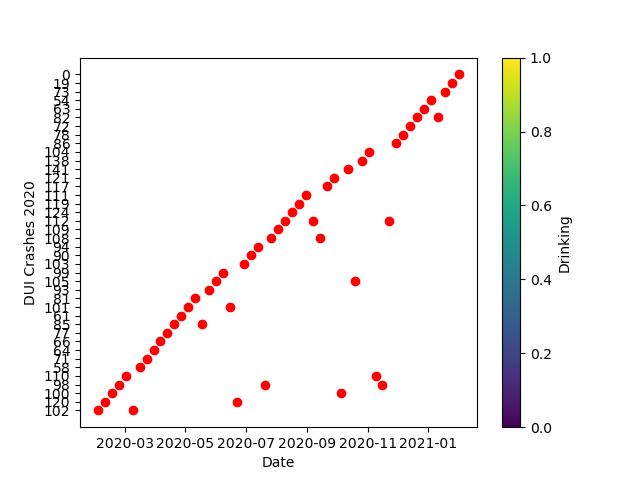

In [84]:
#make a chart to show correlation
plt.scatter(DUI_crashes_df['Date'], DUI_crashes_df['DUI crashes 2020'], color="red", label= "month")
clb = plt.colorbar()
plt.xlabel("Date")
plt.ylabel("DUI Crashes 2020")
clb.set_label("Drinking")
plt.show()